In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from pycards import *
from gravecardutils import *

In [5]:
deck = Deck(include_jokers=True)
statList = [1, 2, 3, 4, 5]                      # Number of cards to draw into hand
targetList = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]    # Target rank to get below based on skill
statsuit = 'c'                                  # Suit of required stat
deck.shuffle()                                  # Shuffle deck
trials = 50000                                  # Number of trial tests

In [6]:
successProb = []           # Probability of success including epic
failureProb = []           # Probability of failure including epic
epicSuccessProb = []       # Probability of epic success
epicFailureProb = []       # Probability of epic failure

In [7]:
for stat in statList:
    for target in targetList:
        results = []

        for t in xrange(trials):
            hand = deck.draw(stat)                 # Draw a hand
            if len(hand) is 0:                     # If hand is empty...
                deck.reset()                       # Reset deck
                deck.shuffle()                     # Shuffle deck
                hand = deck.draw(stat)             # Redraw hand

            #while stat == 1 and hand[0].joker():   # If only card is joker...
            #    deck.replace(0)                    # Replace joker into deck
            #    if deck.drawsize() <= 2:           # If only 2 cards left...
            #        deck.reset()                   # Reset deck
            #    deck.shuffle()                     # Shuffle deck
            #    hand = deck.draw(stat)             # Redraw hand
            
            if stat == 1 and hand[0].joker():       # If only card is joker...
                if deck.drawsize() is 0:            # If deck is empty...
                    deck.reset()                    # Reset deck
                    deck.shuffle()                  # Shuffle deck
                hand += deck.draw(1)                # Draw 1 more
                mod = -1                            # Target modifier
            else:
                mod = 0

            p = passtest(hand, target, statsuit=statsuit, mod=mod)  # Check if hand passes test
            if not p:                                               # If it does not pass...
            #if not p and not (stat == 1 and hand[0].joker()):       # If it does not pass and is not stat 1 joker...
                b = facecardbonus(hand)                             # Check for face card bonuses
                if b > 0:                                           # If there is a bonus...
                    hand += deck.draw(b)                            # Draw bonus cards into hand
                    p = passtest(hand, target, statsuit=statsuit, mod=mod)  # Recheck to see if hand passes

            j = jokercheck(hand)                                    # Check hand for jokers
            if j:
                deck.reset()                                        # Reset and shuffle if joker
                deck.shuffle()
                
            results.append([p, j])
            
            #print hand, p, j, mod

        results = np.array(results)
        tsp = 100 * np.sum(results, axis=0)[0] / float(trials)
        tfp = 100 - tsp
        esp = 100 * np.sum(results.prod(axis=1)) / float(trials)
        efp = 100 * np.sum(results, axis=0)[1] / float(trials) - esp

        successProb.append(tsp)
        failureProb.append(tfp)
        epicSuccessProb.append(esp)
        epicFailureProb.append(efp)

In [8]:
successProb = np.array(successProb).reshape((5, 10))
failureProb = np.array(failureProb).reshape((5, 10))
epicSuccessProb = np.array(epicSuccessProb).reshape((5, 10))
epicFailureProb = np.array(epicFailureProb).reshape((5, 10))

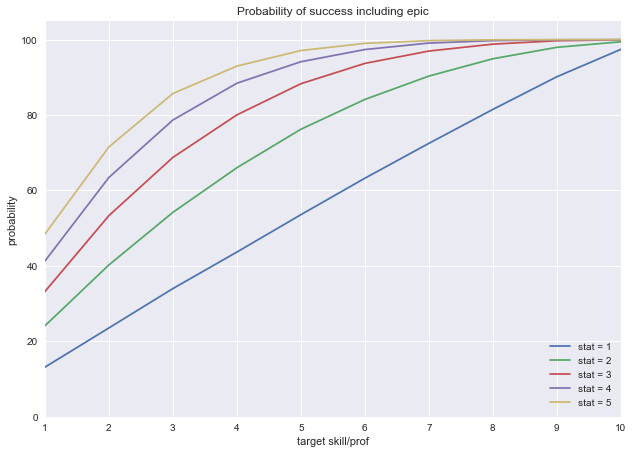

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(targetList, successProb[0], label='stat = 1')
plt.plot(targetList, successProb[1], label='stat = 2')
plt.plot(targetList, successProb[2], label='stat = 3')
plt.plot(targetList, successProb[3], label='stat = 4')
plt.plot(targetList, successProb[4], label='stat = 5')
plt.axis([1,10,0,105])
plt.ylabel('probability')
plt.xlabel('target skill/prof')
plt.legend(loc='lower right')
plt.title('Probability of success including epic')
plt.savefig('plots/success-mod1.png', bbox_inches='tight')

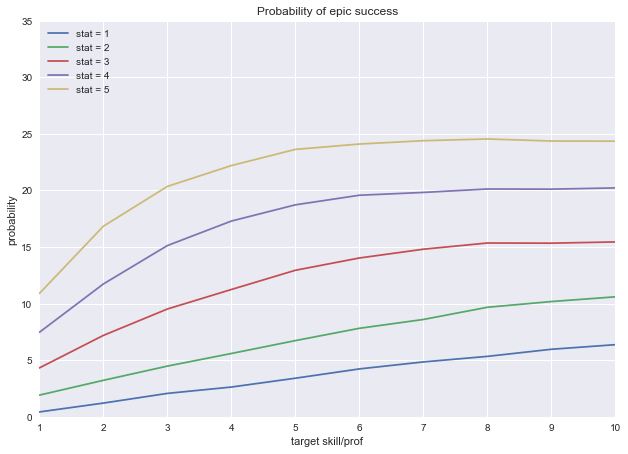

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(targetList, epicSuccessProb[0], label='stat = 1')
plt.plot(targetList, epicSuccessProb[1], label='stat = 2')
plt.plot(targetList, epicSuccessProb[2], label='stat = 3')
plt.plot(targetList, epicSuccessProb[3], label='stat = 4')
plt.plot(targetList, epicSuccessProb[4], label='stat = 5')
plt.axis([1,10,0,35])
plt.ylabel('probability')
plt.xlabel('target skill/prof')
plt.legend(loc='upper left')
plt.title('Probability of epic success')
plt.savefig('plots/epic_success-mod1.png', bbox_inches='tight')

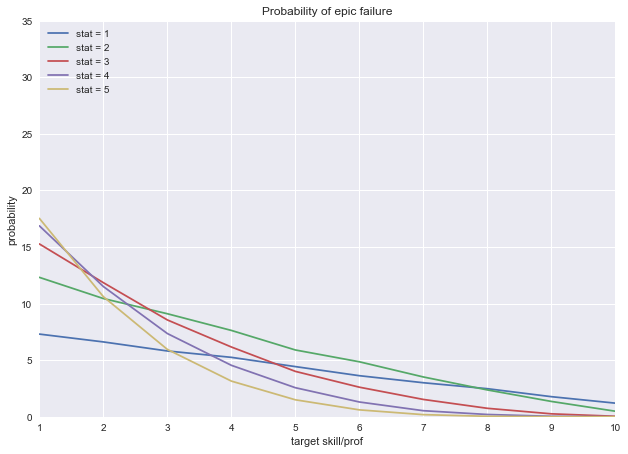

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(targetList, epicFailureProb[0], label='stat = 1')
plt.plot(targetList, epicFailureProb[1], label='stat = 2')
plt.plot(targetList, epicFailureProb[2], label='stat = 3')
plt.plot(targetList, epicFailureProb[3], label='stat = 4')
plt.plot(targetList, epicFailureProb[4], label='stat = 5')
plt.axis([1,10,0,35])
plt.ylabel('probability')
plt.xlabel('target skill/prof')
plt.legend(loc='upper left')
plt.title('Probability of epic failure')
plt.savefig('plots/epic_fail-mod1.png', bbox_inches='tight')